In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calendar

In [2]:
crime_data_to_load = Path("../Resources/crime_grouped_data.csv")
crime_data = pd.read_csv(crime_data_to_load)

## Number of Crimes by Month

In [3]:
crime_data["Date Reported"] = pd.to_datetime(crime_data["Date Reported"])
crime_data["Date Occurred"] = pd.to_datetime(crime_data["Date Occurred"])

crime_data["Month Occurred"] = crime_data["Date Occurred"].dt.month

In [4]:
crime_by_month = crime_data.groupby("Month Occurred").size()

month_df = pd.DataFrame({'Count': crime_by_month, 'Percentage (%)': round(crime_by_month / crime_by_month.sum() * 100,2)})
month_df


,Count,Percentage (%)
Month Occurred,,
1,72860,9.40
2,68515,8.84
3,71005,9.16
4,70028,9.03
5,72973,9.41
6,72350,9.33
7,73939,9.54
8,58256,7.52
9,53163,6.86


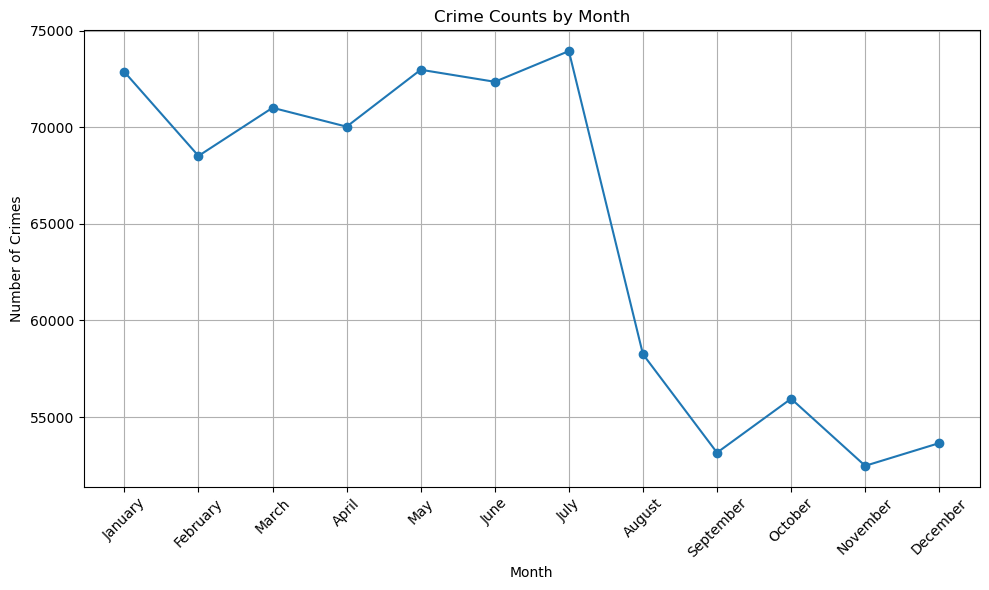

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(crime_by_month.index, crime_by_month.values, marker='o')

plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Month")
plt.grid(True)

month_names = [calendar.month_name[i] for i in crime_by_month.index]
plt.xticks(crime_by_month.index, month_names, rotation=45)

plt.tight_layout() 
plt.show()

## Number of Crimes by Hour

In [6]:
crime_byhour = crime_data.groupby("Crime Code Category")["Hour Occurred"].value_counts()

crime_byhour_df = crime_byhour.unstack(level=0)
crime_byhour_df

Crime Code Category,Assault/Violent Crimes,Burglary/ Theft,Court Order Violations,Crimes Against Minors,Driving Violations,Firearms/Weapons,Miscellaneous,Public Order,Sexually Motivated Crimes,Theft of Identity,Vandalism,Vehicle Crimes,White Collar Crimes
Hour Occurred,,,,,,,,,,,,,
00:00 to 01:00,9691,12327,602,554,118,807,330,605,1731,5920,3766,4354,396
01:00 to 02:00,6404,7573,334,111,102,581,164,447,542,1122,2372,2292,110
02:00 to 03:00,4947,7217,240,75,92,479,129,368,467,621,2143,1937,78
03:00 to 04:00,3356,6916,218,66,58,335,123,319,325,478,1786,1683,70
04:00 to 05:00,2777,6448,222,62,55,268,115,281,244,484,1496,1777,72
05:00 to 06:00,2627,6081,255,140,22,245,107,296,357,1255,1710,2247,98
06:00 to 07:00,3368,6127,383,181,12,267,124,447,408,2895,1787,2527,166
07:00 to 08:00,5085,8823,658,400,23,400,188,638,688,3222,2317,2980,363
08:00 to 09:00,6206,8966,740,285,23,512,214,705,576,2768,2575,2693,391


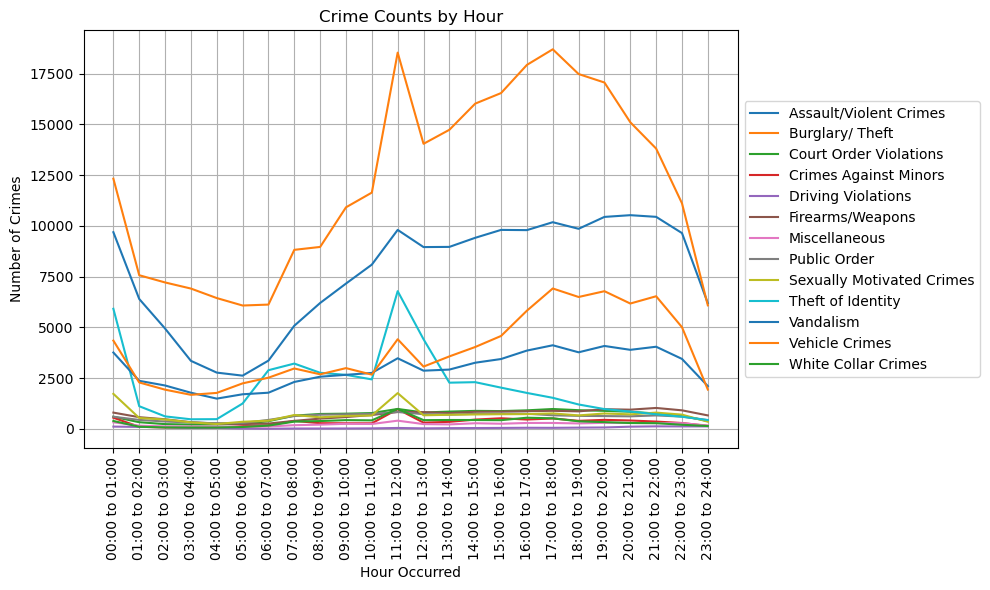

In [7]:
plt.figure(figsize=(10, 6))

for column in crime_byhour_df.columns:
    plt.plot(crime_byhour_df.index, crime_byhour_df[column], label=column)

plt.xlabel("Hour Occurred")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Hour")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.xticks(rotation=90)
plt.tight_layout()  

## Number of Crimes by Crime Code Category

In [8]:
crime_category_count = crime_data["Crime Code Category"].value_counts().sort_values(ascending=False)

crime_category_df = pd.DataFrame({'Count': crime_category_count, 'Percentage (%)': round(crime_category_count / crime_category_count.sum() * 100,2)})
crime_category_df

,Count,Percentage (%)
Burglary/ Theft,290214,37.44
Assault/Violent Crimes,183773,23.71
Vehicle Crimes,93558,12.07
Vandalism,70736,9.13
Theft of Identity,49830,6.43
Sexually Motivated Crimes,16756,2.16
Firearms/Weapons,16520,2.13
Court Order Violations,15994,2.06
Public Order,14408,1.86
Crimes Against Minors,8131,1.05


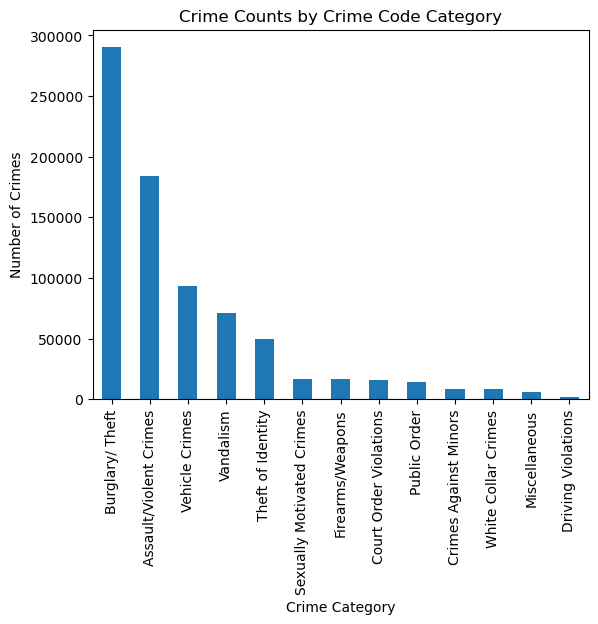

In [9]:
crime_category_chart = crime_category_count.plot(kind='bar')

plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Crime Code Category")

plt.show()

## Nuber of Crimes by Premise Category

In [10]:
premise_count = crime_data["Premise Category"].value_counts().sort_values(ascending=False)

premise_df = pd.DataFrame({'Count': premise_count, 'Percentage (%)': round(premise_count / premise_count.sum() * 100,2)})
premise_df


,Count,Percentage (%)
Outdoor Locations,351026,45.31
Residential,241346,31.15
Commercial Locations,122123,15.76
Transportation,34292,4.43
Public Facilities,17491,2.26
Miscellaneous,8447,1.09


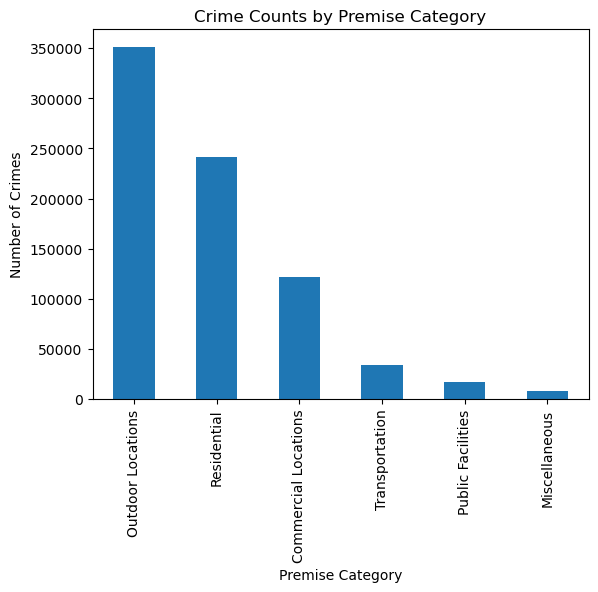

In [11]:
premise_chart = premise_count.plot(kind='bar')

plt.xlabel("Premise Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Premise Category")

plt.show()

## Victims by Age Range

In [12]:
victim_age_range = crime_data["Victim Age Range"].value_counts()

victim_age_df = pd.DataFrame({'Count': victim_age_range, 'Percentage (%)': round(victim_age_range / victim_age_range.sum() * 100,2)})
victim_age_df

,Count,Percentage (%)
26-45,286790,37.00
<18,214965,27.73
46-65,149548,19.29
18-25,84563,10.91
>65,39315,5.07


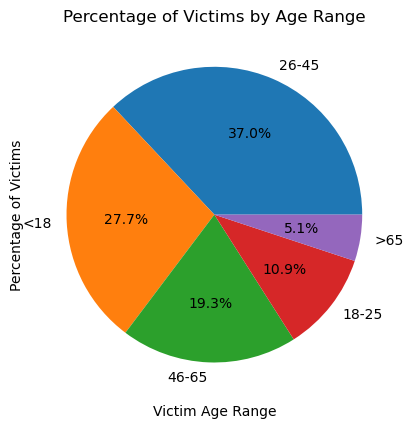

In [13]:
age_chart = victim_age_range.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Age Range")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Age Range")

plt.show()

## Victims by Ethnicity

In [14]:
victim_ethnicity = crime_data["Victim Ethnicity"].value_counts().sort_values(ascending=False)

victim_ethnicity_df = pd.DataFrame({'Count': victim_ethnicity, 'Percentage (%)': round(victim_ethnicity / victim_ethnicity.sum() * 100,2)})
victim_ethnicity_df

,Count,Percentage (%)
Hispanic/Latin/Mexican,237986,35.32
White,158814,23.57
Black,111119,16.49
Unknown,73749,10.95
Other,61418,9.11
Other Asian,16926,2.51
Korean,4124,0.61
Filipino,3196,0.47
Chinese,2925,0.43
Japanese,1081,0.16


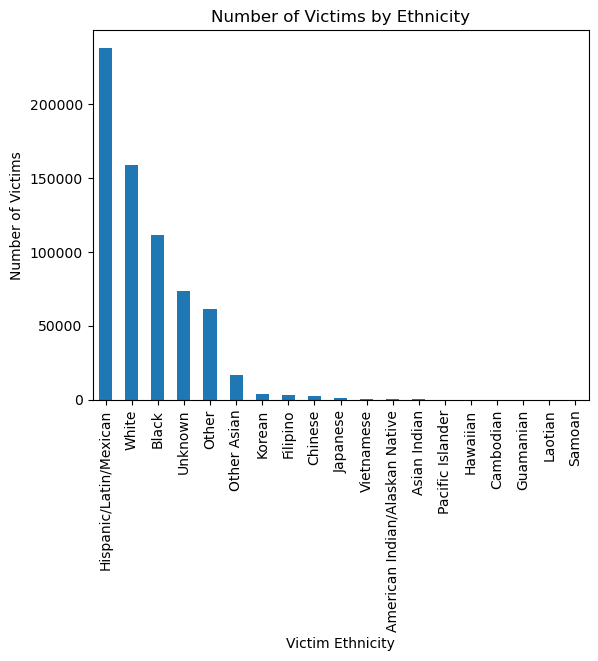

In [15]:
ethnicity_chart = victim_ethnicity.plot(kind='bar')

plt.xlabel("Victim Ethnicity")
plt.ylabel("Number of Victims")
plt.title("Number of Victims by Ethnicity")

plt.show()


## Victims by Sex

In [16]:
victim_sex = crime_data["Victim Sex"].value_counts().sort_values(ascending=False)

victim_sex_df = pd.DataFrame({'Count': victim_sex, 'Percentage (%)': round(victim_sex / victim_sex.sum() * 100,2)})
victim_sex_df

,Count,Percentage (%)
Male,320994,47.64
Female,286216,42.48
Unknown,66612,9.89


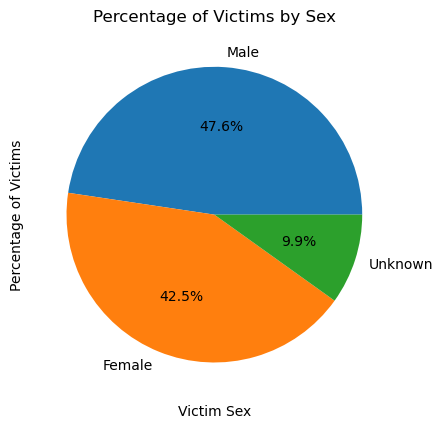

In [17]:
sex_chart = victim_sex.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Sex")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Sex")

plt.show()